# Pattern Recognition - assignment 1

* Bjorn Bruns (student id 1)
* Mikhail Ternyuk (student id 2)

# 1. Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# for i in range(28):
#     feature = 'pixel' + str(i)
#     border_marked = df[df[feature] != 0]
#     if border_marked.shape[0] > 0:
#         print(border_marked['label']) 
        
        
for i in range(27, 783, 28):
    feature = 'pixel' + str(i)
    border_marked = df[df[feature] != 0]
    if border_marked.shape[0] > 0:
        print(border_marked['label'])

740    5
Name: label, dtype: int64
740      5
9193     5
11690    8
24247    8
26361    5
27004    5
34413    5
35846    8
36054    5
36357    0
37458    8
Name: label, dtype: int64
9064     8
9193     5
11690    8
15953    5
24247    8
26361    5
27004    5
34413    5
35846    8
36054    5
36357    0
37458    8
37650    5
Name: label, dtype: int64
3374     5
5471     8
6341     5
9064     8
15953    5
22873    5
35381    8
37458    8
37650    5
Name: label, dtype: int64
244      5
3374     5
5471     8
6341     5
15395    5
22721    8
22873    5
32569    8
35381    8
36320    8
37650    5
Name: label, dtype: int64
244      5
5471     8
13032    1
15395    5
22721    8
22873    5
27175    5
32569    8
35381    8
35943    8
36320    8
Name: label, dtype: int64
13032    1
21778    7
26790    8
27175    5
32569    8
35943    8
36320    8
38142    1
39840    8
Name: label, dtype: int64
3674     2
21778    7
26790    8
38142    1
39840    8
40907    2
Name: label, dtype: int64
3674     2
39

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


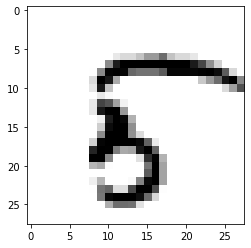

In [20]:
input_data = np.array(df.drop(["label"], axis=1))
digit_image = input_data[22873].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

In [6]:
plt.hist(labels, bins=50, histtype='step')

NameError: name 'labels' is not defined

In [ ]:
labels = df["label"]
for i in range(0,10):
    count_i = labels[labels == i]
    precentege = count_i.count()/labels.count() * 100 
    print("Label {}: {:0.2f}%".format(i, precentege))

In [25]:
input_data = np.array(df.drop(["label"], axis=1))
input_data[input_data < 200] = 0

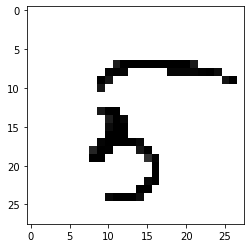

In [26]:
digit_image = input_data[22873].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

In [45]:
#new_df = df.drop(["label"], axis=1) 
df["density"] = df.iloc[:, 1:].astype(bool).sum(axis=1)

In [ ]:
new_df.iloc[:, [0,-1]]

In [46]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,98
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,246
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,261


In [47]:
DF_Label_Density = df.iloc[:, [0,-1]]

In [48]:
DF_Label_Density.head()

,label,density
0,1,98
1,0,246
2,1,80
3,4,114
4,0,261


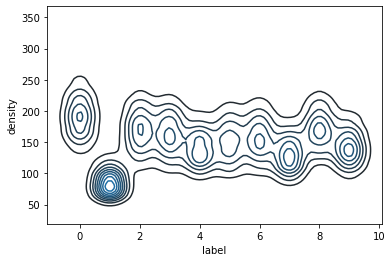

In [49]:
sns.kdeplot(DF_Label_Density["label"], DF_Label_Density["density"], )

In [ ]:
sns.barplot(x="label", y="density", data=DF_Label_Density, ci=68)

In [ ]:
sns.boxplot(x="label", y="density", data=DF_Label_Density)

In [50]:
label = 9
DF_Label_Density['density'][DF_Label_Density['label'] == label].mean()

144.25143266475644

In [51]:
def density_analyse(data):
    mean_diff = []
    for i in range(0, 10):
        for j in range(0, 10):
            if j != i:
                mean_dense_i = DF_Label_Density['density'][DF_Label_Density['label'] == i].mean()
                mean_dense_j = DF_Label_Density['density'][DF_Label_Density['label'] == j].mean()
                mean_difference = abs(mean_dense_i - mean_dense_j)
                mean_diff.append([mean_difference, j, i])
    
    data_frame = pd.DataFrame(mean_diff, columns=["dens_diff", "label_x", "label_y"])
    sorted_df = data_frame.sort_values(by='dens_diff')
                
    return sorted_df.iloc[::2], np.array(sorted_df.iloc[1:2]).reshape(3), np.array(sorted_df.iloc[-2:-1]).reshape(3) 

In [52]:
mean_diff, min_diff, max_diff = density_analyse(DF_Label_Density)

print("Max mean density difference {:0.0f} between {} and {}".format(max_diff[0], int(max_diff[1]), int(max_diff[2])))
print("Min mean density difference {:0.0f} between {} and {}".format(min_diff[0], int(min_diff[1]), int(min_diff[2])))


Max mean density difference 106 between 0 and 1
Min mean density difference 2 between 4 and 9


In [53]:
mean_diff

,dens_diff,label_x,label_y
44,1.751924,9,4
25,5.005499,8,2
32,5.309825,6,3
29,5.448039,2,3
50,5.454588,6,5
86,9.504035,5,9
67,10.078468,4,7
34,10.453538,8,3
23,10.757864,6,2
48,10.764413,3,5


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [82]:
LR = LogisticRegression()

X = np.array(DF_Label_Density["density"]).reshape(-1, 1)
X = scale(X)
y = DF_Label_Density["label"]

NameError: name 'DF_Label_Density' is not defined

In [110]:
LE = LabelEncoder()
LE.fit([0,1,2,3,4,5,6,7,8,9])
encoded_labels = LE.transform(y)

In [112]:
input_data = np.array(df.drop(["label"], axis=1))
input_data[input_data < 200] = 0

In [113]:
X_train, X_test, y_train, y_test = train_test_split(input_data, encoded_labels, test_size=0.33, random_state=42)

In [ ]:
LR.fit(X_train, y_train)

In [ ]:
prediction = LR.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction)

In [ ]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
clearDF = df
counter = 0
first_pix = 0
last_pix = 27
# while (first_pix < 784) or (last_pix < 784):
#     feature_first = "pixel" + str(first_pix)
#     feature_last = "pixel" + str(last_pix)
#      if clearDF[feature_first].sum() == 0:
#          print(feature_first)
#          clearDF = clearDF.drop(feature_first, axis=1)
        
#     if clearDF[feature_last].sum() == 0:
#         print(feature_last) 
#         clearDF = clearDF.drop(feature_last, axis=1)
#         counter += 1
        
#     first_pix += 28
#     last_pix += 28

# print(counter)

# pix = 0
# while (pix < 27):
#     feature = "pixel" + str(pix)
#     if clearDF[feature].sum() == 0:
#         print(feature)
#         clearDF = clearDF.drop(feature, axis=1)
#         counter += 1
#     pix += 1
    
# print(counter)

pix = 783
while (pix > 755):
    feature = "pixel" + str(pix)
    clearDF[feature].sum()
    if clearDF[feature].sum() == 0:
        print(feature)
        clearDF = clearDF.drop(feature, axis=1)
        counter += 1
    pix -= 1
    
print(counter)

pixel783
pixel782
pixel781
pixel780
pixel760
pixel759
pixel758
pixel757
pixel756
9


In [56]:
clearDF = df
for i in df.columns:
    if clearDF[i].sum() == 0:
        print("Deleted feature: ", i)
        clearDF = clearDF.drop(i, axis=1)

Deleted feature:  pixel0
Deleted feature:  pixel1
Deleted feature:  pixel2
Deleted feature:  pixel3
Deleted feature:  pixel4
Deleted feature:  pixel5
Deleted feature:  pixel6
Deleted feature:  pixel7
Deleted feature:  pixel8
Deleted feature:  pixel9
Deleted feature:  pixel10
Deleted feature:  pixel11
Deleted feature:  pixel16
Deleted feature:  pixel17
Deleted feature:  pixel18
Deleted feature:  pixel19
Deleted feature:  pixel20
Deleted feature:  pixel21
Deleted feature:  pixel22
Deleted feature:  pixel23
Deleted feature:  pixel24
Deleted feature:  pixel25
Deleted feature:  pixel26
Deleted feature:  pixel27
Deleted feature:  pixel28
Deleted feature:  pixel29
Deleted feature:  pixel30
Deleted feature:  pixel31
Deleted feature:  pixel52
Deleted feature:  pixel53
Deleted feature:  pixel54
Deleted feature:  pixel55
Deleted feature:  pixel56
Deleted feature:  pixel57
Deleted feature:  pixel82
Deleted feature:  pixel83
Deleted feature:  pixel84
Deleted feature:  pixel85
Deleted feature:  pixe

In [49]:
addition = pd.DataFrame()
for pix in range(5):
    feature = "new_pix" + str(pix)
    arr_zero = np.zeros((42000, ), dtype=int)
    addition[feature] = arr_zero

full_clearDF = pd.concat([clearDF, addition], axis=1)

In [66]:
in_data = np.array(clearDF.drop(["label"], axis=1))
in_data[in_data < 100] = 0
digit_image = in_data[13].reshape(27, 27)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

ValueError: cannot reshape array of size 733 into shape (27,27)

In [ ]:
def determine_useless_features(x):
    
    for arr in x:
        if arr.sum(axis=0) != 0:
            

In [99]:
input_data = np.array(df.drop(["label"], axis=1))

def check_simmetry(x):
    dens_1, dens_2 = 0, 0
    simmetry = np.array([])
    for i_set in x:
        matr = i_set.reshape(28,28)
        newDF = pd.DataFrame(matr)
        for y in range(13):
            dens_1 = dens_1 + np.array(newDF[y]).astype(bool).sum()
        for y in range(14, 28):
            dens_2 = dens_2 + np.array(newDF[y]).astype(bool).sum()
        print("First half: ", dens_1)
        print("Second half: ", dens_2)
        print("Simmetry: ", abs(dens_1 - dens_2))
        break
            
        simmetry = np.append(simmetry, [abs(dens_1 - dens_2)])
    
    return simmetry

sim = check_simmetry(input_data)

First half:  40
Second half:  50
Simmetry:  10


In [79]:
sim

array([1.000000e+01, 1.800000e+01, 3.900000e+01, ..., 1.117841e+06,
       1.117876e+06, 1.117906e+06])

In [58]:
LR = LogisticRegression()

X = clearDF.drop('label', axis=1)
X = scale(X)
y = clearDF["label"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)

In [88]:
confusion_matrix(y_test, prediction)
accuracy_score(y_test, prediction)

0.908008658008658

In [95]:
confusion_matrix(y_test, prediction)

array([[1288,    0,    6,    2,    2,   17,   12,    0,    5,    1],
       [   0, 1479,    9,    4,    1,    6,    2,    2,   15,    2],
       [  11,   23, 1235,   33,   26,   10,   25,   19,   31,    1],
       [   8,    4,   40, 1285,    5,   51,    5,   19,   36,   18],
       [   6,    7,   13,    4, 1252,    4,    8,    6,    9,   49],
       [  11,    4,    8,   47,   23, 1028,   27,    7,   35,   15],
       [  15,    6,    8,    0,    9,   16, 1327,    3,   13,    0],
       [   4,   11,   23,    9,   25,    4,    3, 1346,    5,   50],
       [  11,   32,   12,   34,   16,   43,    6,    4, 1158,   18],
       [  13,    6,    7,   23,   31,   17,    0,   47,   17, 1187]])